In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
import numpy as np

In [72]:
from utils.events import read_actions


actions = read_actions()
actions

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,success,duel_type,goalkeeper_type,card_type,match_id,player_jersey_num,player_position_group_type,receiver_jersey_num,receiver_position_group_type,action_type
0,12926009,PASS,1,00:02:33.887000,None,alive,5,5,15620,0.503105,...,<NA>,<NA>,<NA>,<NA>,13335,17.0,LW,5.0,LCB,PASS
1,12926647,PASS,1,00:02:36.623000,None,alive,5,5,4696,0.329743,...,<NA>,<NA>,<NA>,<NA>,13335,5.0,LCB,28.0,RCB,PASS
2,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,14278,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,28.0,RCB,NaN,NaN,TACKLE
3,12926642,DUEL,1,00:02:39.860000,None,alive,11,11,284,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,6.0,LCB,NaN,NaN,TACKLE
4,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,13068,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,30.0,RW,NaN,NaN,TACKLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591723,18703655,DUEL,2,01:47:10.097000,None,alive,218,218,567,0.298400,...,<NA>,AERIAL,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,TACKLE
591724,18703656,PASS,2,01:47:10.130000,None,alive,218,218,567,0.296752,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS
591725,18703661,CARRY,2,01:47:13.100000,01:47:14.101000,alive,218,218,7252,0.280362,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,DRIBBLE
591726,18703665,PASS,2,01:47:14.101000,None,alive,218,218,7252,0.305095,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS


In [73]:
gamestates = pd.read_parquet("./gamestates.parquet")

gamestates = gamestates[
    (gamestates['start_x'] >= 30) &
    (gamestates['start_x'] < 105/2) &
    (gamestates['start_y'] < 34) &
    (gamestates['start_y'] >= 20) &

    (gamestates['end_x'] >= 35) &
    (gamestates['end_x'] < 105/2) &
    (gamestates['end_y'] <= 10) &
    (gamestates['end_y'] > -20)
]

gamestates

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,27.236,46.140,-11.708,1,5.0,10.0,1.0,1.0,0.024080,-0.021505
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,26.102,41.995,4.524,0,3.0,7.0,0.0,2.0,0.071664,-0.097317
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,20.863,47.882,-7.707,1,3.0,10.0,1.0,0.0,0.057446,0.026197
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,21.388,47.707,-7.719,1,4.0,8.0,1.0,2.0,0.068060,-0.023503
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,21.410,45.218,2.658,0,3.0,5.0,0.0,1.0,0.014662,-0.019568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,20480,18694106,1,TAKE_ON,-12.158,0.557,-12.158,0.557,PASS,4.826,...,26.171,41.424,5.987,0,NaN,NaN,NaN,NaN,NaN,NaN
9987,20480,18695804,1,PASS,40.612,25.782,27.850,23.666,TAKE_ON,29.707,...,24.153,45.677,8.841,0,NaN,NaN,NaN,NaN,NaN,NaN
9988,20480,18696295,1,TAKE_ON,-2.372,31.494,-2.372,31.494,PASS,24.649,...,28.960,42.456,-3.237,1,NaN,NaN,NaN,NaN,NaN,NaN
9990,20480,18700427,1,PASS,31.922,17.585,37.174,11.438,PASS,38.226,...,25.711,48.942,-8.328,0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
from tracking.read import read_by_match_id

match_id = 13359

tracking_df = read_by_match_id(match_id)

In [75]:
from tracking.process import _calculate_smoothed_velocity, _standardize_crossings_direction

tracking_df = _calculate_smoothed_velocity(tracking_df)

tracking_df.head()

,match_id,period,period_game_clock,frame_num,game_event_id,possession_event_id,element,jersey_number,x,y,team_id,vx,vy
0,13359.0,1.0,0.000788,4649.0,13451376.0,13440479.0,home,1.0,-39.155,-0.807,5.0,0.408333,0.05
1,NaN,1.0,0.034155,4650.0,NaN,NaN,home,1.0,-39.139,-0.805,5.0,0.412500,0.05
2,NaN,1.0,0.067522,4651.0,NaN,NaN,home,1.0,-39.122,-0.803,5.0,0.410000,0.05
3,NaN,1.0,0.100889,4652.0,NaN,NaN,home,1.0,-39.106,-0.801,5.0,0.408333,0.05
4,NaN,1.0,0.134255,4653.0,NaN,NaN,home,1.0,-39.089,-0.799,5.0,0.407143,0.05


In [120]:
gamestates[gamestates["match_id"] == match_id]

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,start_y,end_x,end_y,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff
633,13359,13447236,5,PASS,3.747,3.905,9.840,18.382,PASS,16.666,...,26.060,44.092,5.044,1,3.0,6.0,0.0,1.0,0.049089,0.042398
642,13359,13487893,3,PASS,-4.685,26.601,3.598,22.833,PASS,6.468,...,24.090,46.034,3.203,1,1.0,2.0,0.0,1.0,0.019298,-0.010971
645,13359,13490604,5,PASS,5.517,1.918,12.266,15.793,PASS,19.764,...,25.412,42.913,4.919,0,1.0,3.0,0.0,0.0,0.051847,-0.045356
646,13359,13491907,3,CLEARANCE,38.506,1.136,38.506,1.136,PASS,31.711,...,23.877,40.308,9.279,1,6.0,10.0,1.0,0.0,0.035071,0.030810
649,13359,13494755,5,DRIBBLE,22.108,18.736,21.145,20.666,PASS,21.145,...,25.318,51.762,3.631,0,3.0,5.0,0.0,1.0,0.038654,-0.050763


In [138]:
event_id = 13447236

frame = tracking_df[tracking_df["possession_event_id"] == event_id]
action = actions[actions["event_id"] == event_id]
action

# def standarlize_frame(df, action):
#     team_id = action["team_id"]

#     player_with_ball = frame[
#         (frame["x"] == player_jersey_num) &
#         (frame["team_id"] == team_id)
#     ].iloc[0]

#     if player_with_ball["x"] < 0:
#         df.loc["x"] = df.loc["x"] * -1
#         df.loc["vx"] = df.loc["vx"] * -1

#     if player_with_ball["y"] < 0:
#         df.loc["y"] = df.loc["y"] * -1
#         df.loc["vy"] = df.loc["vy"] * -1

frame = _standardize_crossings_direction(frame, action)
action = gamestates[gamestates["event_id"] == event_id]

A entropia geral na coordenada final (44.09, 5.04) é: 0.0491


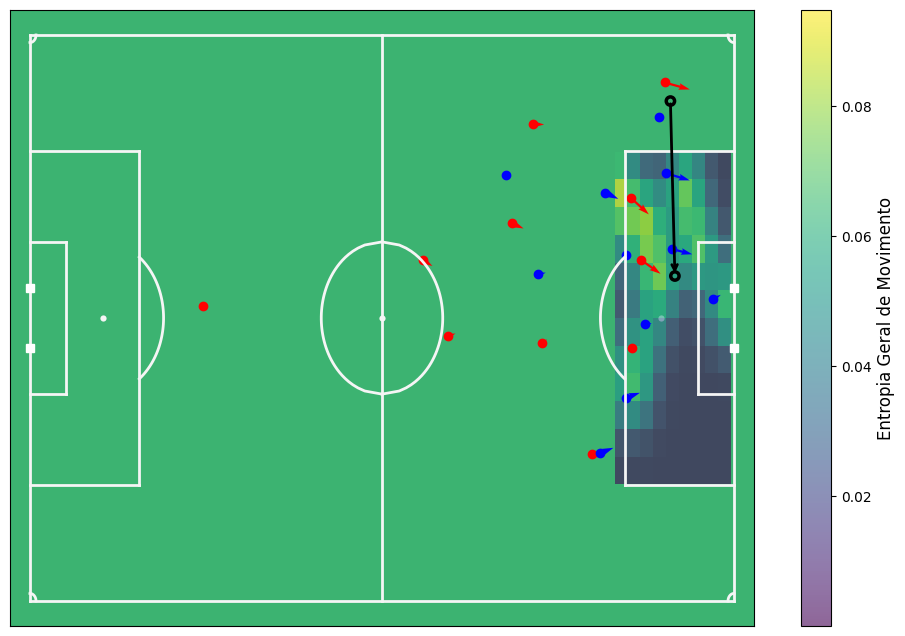

In [139]:
# pitch = Pitch(pitch_color="green", line_color="white")
# fig, ax = pitch.draw(figsize=(14, 8))

from matplotlib import cm
from matplotlib.colors import Normalize
from utils.plot import plot_pitch
from scipy.ndimage import gaussian_filter

fig, ax = plot_pitch()

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

num_bins_x = 9
num_bins_y = 12

def calc_entropy_general(df_players):
    """
    Calcula a entropia geral de um conjunto de jogadores.
    """
    speed_hist, xedges, yedges = np.histogram2d(
        df_players["x_future"],
        df_players["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]], # Ajuste o range conforme a área de interesse
        weights=df_players["speed"]
    )
    p = speed_hist / speed_hist.sum()
    # Evita log de zero, que resultaria em -inf
    p[p == 0] = 1e-10 # Substitui zeros por um valor muito pequeno
    entropy_matrix = -p * np.log2(p)
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges

# Calcula a entropia geral para todos os jogadores no frame
entropy_general, xedges, yedges = calc_entropy_general(frame)

# Plotar o mapa de calor da entropia geral
heatmap_general = ax.pcolormesh(
    xedges,
    yedges,
    entropy_general.T,
    cmap=cm.viridis, # Ou outro cmap que goste para uma única escala, como 'hot', 'magma', 'plasma'
    shading='auto',
    alpha=0.6 # Ajuste a transparência se quiser ver mais o campo
)
cbar_general = fig.colorbar(heatmap_general, ax=ax)
cbar_general.set_label("Entropia Geral de Movimento", fontsize=12)

# Plotagem dos jogadores e da ação (mantido do seu código original)
team_id = action.iloc[0]["team_id"] # Para identificar a equipe atacante/defensora na plotagem de jogadores
attack_team = frame[frame["team_id"] == team_id]
defense_team = frame[frame["team_id"] != team_id]

ax.scatter(
    attack_team["x"],
    attack_team["y"],
    color="red"
)

ax.quiver(
    attack_team["x"],
    attack_team["y"],
    attack_team["vx"],
    attack_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
    width=0.003
)

ax.scatter(
    defense_team["x"],
    defense_team["y"],
    color="blue"
)

ax.quiver(
    defense_team["x"],
    defense_team["y"],
    defense_team["vx"],
    defense_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
    width=0.003
)

start_x = action["start_x"].iloc[0]
start_y = action["start_y"].iloc[0]
end_x = action["end_x"].iloc[0]
end_y = action["end_y"].iloc[0]

ax.scatter(start_x, start_y, facecolors='none', edgecolors='black', linewidths=2.5)
ax.scatter(end_x, end_y, facecolors='none', edgecolors='black', linewidths=2.5)

ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(arrowstyle="->", color='black', linewidth=2)
)


def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range


entropy_at_end_coord = get_entropy_at_coordinates(end_x, end_y, entropy_general, xedges, yedges)
print(f"A entropia geral na coordenada final ({end_x:.2f}, {end_y:.2f}) é: {entropy_at_end_coord:.4f}")



A entropia geral na coordenada final (44.09, 5.04) é: 0.0424


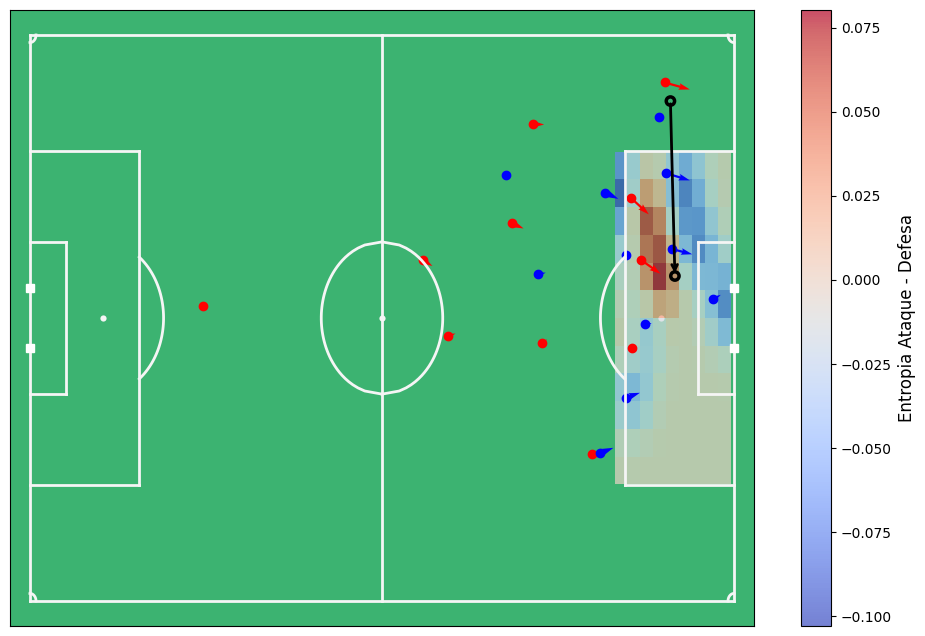

In [140]:

# pitch = Pitch(pitch_color="green", line_color="white")
# fig, ax = pitch.draw(figsize=(14, 8))

from matplotlib import cm
from matplotlib.colors import Normalize
from utils.plot import plot_pitch


fig, ax = plot_pitch()

team_id = action.iloc[0]["team_id"]

attack_team = frame[frame["team_id"] == team_id]
defense_team = frame[frame["team_id"] != team_id]

num_bins_x = 9
num_bins_y = 12

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

def calc_entropy_team(df_team):
    speed_hist, xedges, yedges = np.histogram2d(
        df_team["x_future"],
        df_team["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]],
        weights=df_team["speed"]
    )
    p = speed_hist / speed_hist.sum()
    entropy_matrix = np.zeros_like(p)
    mask = p > 0
    entropy_matrix[mask] = -p[mask] * np.log2(p[mask])
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges

entropy_attack, xedges, yedges = calc_entropy_team(attack_team)
entropy_defense, _, _ = calc_entropy_team(defense_team)

# Diferença (ataque menos defesa)
entropy_diff = entropy_attack - entropy_defense

heatmap_diff = ax.pcolormesh(
    xedges,
    yedges,
    entropy_diff.T,
    cmap=cm.coolwarm,  # azul/vermelho para diferença positiva/negativa
    shading='auto',
    alpha=0.7
)
cbar_diff = fig.colorbar(heatmap_diff, ax=ax)
cbar_diff.set_label("Entropia Ataque - Defesa", fontsize=12)


ax.scatter(
    attack_team["x"],
    attack_team["y"],
    color="red"
)

ax.quiver(
    attack_team["x"],
    attack_team["y"],
    attack_team["vx"],
    attack_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="red",   # ou use uma lista para colorir por time
    width=0.003
)

ax.scatter(
    defense_team["x"],
    defense_team["y"],
    color="blue"
)

ax.quiver(
    defense_team["x"],
    defense_team["y"],
    defense_team["vx"],
    defense_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="blue",   # ou use uma lista para colorir por time
    width=0.003
)


start_x = action["start_x"].iloc[0]
start_y = action["start_y"].iloc[0]
end_x = action["end_x"].iloc[0]
end_y = action["end_y"].iloc[0]

ax.scatter(start_x, start_y, facecolors='none', edgecolors='black', linewidths=2.5)
ax.scatter(end_x, end_y, facecolors='none', edgecolors='black', linewidths=2.5)

ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(arrowstyle="->", color='black', linewidth=2)
)

def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range


entropy_at_end_coord = get_entropy_at_coordinates(end_x, end_y, entropy_diff, xedges, yedges)
print(f"A entropia geral na coordenada final ({end_x:.2f}, {end_y:.2f}) é: {entropy_at_end_coord:.4f}")


In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit  # função logística

# Parâmetros do modelo
reaction_time = 0.7          # tempo para reagir
max_speed = 5.0              # velocidade máxima (m/s)
tti_sigma = 0.45             # incerteza no tempo de chegada (segundos)
lambda_att = 4.3             # curva logística de posse
lambda_def = 4.3

# Grid do campo
field_length, field_width = 105, 68
nx, ny = 60, 40
xgrid = np.linspace(-field_length/2, field_length/2, nx)
ygrid = np.linspace(-field_width/2, field_width/2, ny)
X, Y = np.meshgrid(xgrid, ygrid)

# Inicializa os mapas de controle
PPCF_attacker = np.zeros_like(X)
PPCF_defense = np.zeros_like(X)

# Itera sobre os jogadores
for _, player in frame.iterrows():
    team_id = player['team_id']

    px, py = player['x'], player['y']
    vx, vy = player['vx'], player['vy']

    # Vetores de direção e distância até cada ponto do campo
    dx = X - px
    dy = Y - py
    distance = np.hypot(dx, dy)

    # Velocidade atual e direção normalizada
    speed = np.hypot(vx, vy)
    if speed > 0:
        direction = np.array([vx, vy]) / speed
        projection = dx * direction[0] + dy * direction[1]  # projeção na direção do movimento
        speed_effective = np.clip(speed, 0.01, max_speed)
        t_reach = reaction_time + (distance - 0.3 * projection) / speed_effective
    else:
        t_reach = reaction_time + distance / max_speed

    # Função logística do tempo para estimar probabilidade de controle
    if action.iloc[0]["team_id"] == team_id:
        PPCF_attacker += expit(-lambda_att * (t_reach - t_reach.min()))
    else:
        PPCF_defense += expit(-lambda_def * (t_reach - t_reach.min()))

# Normalização final (probabilidade de posse soma 1)
PPCF_total = PPCF_attacker + PPCF_defense
PPCF_total[PPCF_total == 0] = 1e-6
PPCF_attacker /= PPCF_total
PPCF_defense /= PPCF_total
PPCF_diff = PPCF_attacker - PPCF_defense


Text(43.417, 26.060000000000002, '')

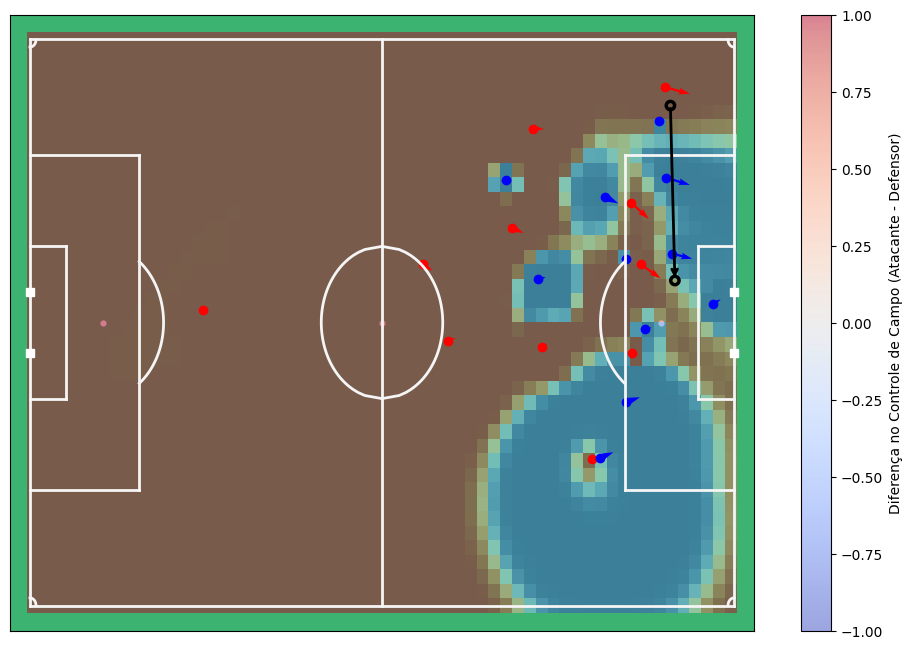

In [142]:
# Grid do campo
field_length, field_width = 105, 68
nx, ny = 60, 40
xgrid = np.linspace(-field_length/2, field_length/2, nx)
ygrid = np.linspace(-field_width/2, field_width/2, ny)
X, Y = np.meshgrid(xgrid, ygrid)

# fig, ax = plot_pitch()

fig, ax = plot_pitch()

# Use pcolormesh for a heatmap of pitch control
# We use xgrid and ygrid as the coordinates for the grid cells
c = ax.pcolormesh(xgrid, ygrid, PPCF_diff, cmap=cm.coolwarm, shading='auto', vmin=-1, vmax=1, alpha=0.5)

# Add a color bar
fig.colorbar(c, ax=ax, label='Diferença no Controle de Campo (Atacante - Defensor)')

ax.scatter(
    attack_team["x"],
    attack_team["y"],
    color="red"
)

ax.quiver(
    attack_team["x"],
    attack_team["y"],
    attack_team["vx"],
    attack_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="red",   # ou use uma lista para colorir por time
    width=0.003
)

ax.scatter(
    defense_team["x"],
    defense_team["y"],
    color="blue"
)

ax.quiver(
    defense_team["x"],
    defense_team["y"],
    defense_team["vx"],
    defense_team["vy"],
    angles="xy",
    scale_units="xy",
    scale=1,        # ajuste o valor para escalar os vetores
    color="blue",   # ou use uma lista para colorir por time
    width=0.003
)


start_x = action["start_x"].iloc[0]
start_y = action["start_y"].iloc[0]
end_x = action["end_x"].iloc[0]
end_y = action["end_y"].iloc[0]

ax.scatter(start_x, start_y, facecolors='none', edgecolors='black', linewidths=2.5)
ax.scatter(end_x, end_y, facecolors='none', edgecolors='black', linewidths=2.5)

ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(arrowstyle="->", color='black', linewidth=2)
)

In [143]:
def get_grid_indices(x, y, xgrid, ygrid):
    # Ensure coordinates are within grid bounds
    x_clamped = np.clip(x, xgrid.min(), xgrid.max())
    y_clamped = np.clip(y, ygrid.min(), ygrid.max())
    idx_x = np.argmin(np.abs(xgrid - x_clamped))
    idx_y = np.argmin(np.abs(ygrid - y_clamped))
    return idx_y, idx_x # Return (row, col) which corresponds to (y, x)


idx_y, idx_x = get_grid_indices(action.iloc[0]["end_x"], action.iloc[0]["end_y"], xgrid, ygrid)
PPCF_diff[idx_y, idx_x]


0.5170159260452479

In [144]:
import numpy as np

def count_players_near_action_line(action, attack_team, defense_team, threshold=2.0):
    # Coordenadas da ação (ex: passe)
    x0, y0 = action["start_x"].iloc[0], action["start_y"].iloc[0]
    x1, y1 = action["end_x"].iloc[0], action["end_y"].iloc[0]

    # Vetor da reta da ação
    dx = x1 - x0
    dy = y1 - y0
    norm = np.hypot(dx, dy)

    if norm == 0:
        # ação inválida (ponto)
        return 0, 0

    # Função auxiliar: calcula a distância ponto–reta
    def distance_to_line(x, y):
        return np.abs(dy * x - dx * y + x1 * y0 - y1 * x0) / norm

    # Distância de cada jogador da reta da ação
    attack_dist = distance_to_line(attack_team["x"].values, attack_team["y"].values)
    defense_dist = distance_to_line(defense_team["x"].values, defense_team["y"].values)

    # Ponto projetado deve estar entre start e end (reta finita)
    def is_between_projection(x, y):
        # produto escalar entre (p - start) e (end - start), normalizado
        proj = ((x - x0) * dx + (y - y0) * dy) / (norm**2)
        return (proj >= 0) & (proj <= 1)

    attack_mask = (attack_dist < threshold) & is_between_projection(attack_team["x"].values, attack_team["y"].values)
    defense_mask = (defense_dist < threshold) & is_between_projection(defense_team["x"].values, defense_team["y"].values)

    attackers_near_line = np.sum(attack_mask)
    defenders_near_line = np.sum(defense_mask)

    return attackers_near_line, defenders_near_line


In [145]:
attackers, defenders = count_players_near_action_line(action, attack_team, defense_team, threshold=2.0)

print(f"Nº de atacantes próximos à linha da ação: {attackers}")
print(f"Nº de defensores próximos à linha da ação: {defenders}")


Nº de atacantes próximos à linha da ação: 0
Nº de defensores próximos à linha da ação: 3


In [ ]:
num_bins_x = 9
num_bins_y = 12

# Cálculo da velocidade
frame["speed"] = np.hypot(frame["vx"], frame["vy"])
frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
frame["y_future"] = frame["y"] + frame["vy"] * 1.0

In [73]:
def calc_entropy_general(df_players):
    """
    Calcula a entropia geral de um conjunto de jogadores.
    """
    speed_hist, xedges, yedges = np.histogram2d(
        df_players["x_future"],
        df_players["y_future"],
        bins=[num_bins_x, num_bins_y],
        range=[[35, 105/2], [-20, 20]],
        weights=df_players["speed"]
    )
    p = speed_hist / speed_hist.sum()
    # Evita log de zero, que resultaria em -inf
    p[p == 0] = 1e-10 # Substitui zeros por um valor muito pequeno
    entropy_matrix = -p * np.log2(p)
    entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
    return entropy_smoothed, xedges, yedges


In [93]:
def calc_entropy_diff(frame, action):
    team_id = action["team_id"]

    attack_team = frame[frame["team_id"] == team_id]
    defense_team = frame[frame["team_id"] != team_id]

    def calc_entropy_team(df_team):
        speed_hist, xedges, yedges = np.histogram2d(
            df_team["x_future"],
            df_team["y_future"],
            bins=[num_bins_x, num_bins_y],
            range=[[35, 105/2], [-20, 20]],
            weights=df_team["speed"]
        )
        p = speed_hist / speed_hist.sum()
        entropy_matrix = np.zeros_like(p)
        mask = p > 0
        entropy_matrix[mask] = -p[mask] * np.log2(p[mask])
        entropy_smoothed = gaussian_filter(entropy_matrix, sigma=1.0)
        return entropy_smoothed, xedges, yedges

    entropy_attack, xedges, yedges = calc_entropy_team(attack_team)
    entropy_defense, _, _ = calc_entropy_team(defense_team)

    # Diferença (ataque menos defesa)
    entropy_diff = entropy_attack - entropy_defense

    return entropy_diff, xedges, yedges

In [ ]:
def get_entropy_at_coordinates(x_coord, y_coord, entropy_matrix, xedges, yedges):
    """
    Retorna o valor de entropia da célula da grade que contém (x_coord, y_coord).
    
    Args:
        x_coord (float): Coordenada X do ponto.
        y_coord (float): Coordenada Y do ponto.
        entropy_matrix (np.array): A matriz de entropia (suavizada ou não).
        xedges (np.array): Array das bordas X dos bins.
        yedges (np.array): Array das bordas Y dos bins.
        
    Returns:
        float: O valor de entropia do bin, ou NaN se a coordenada estiver fora do range.
    """
    # Encontra o índice do bin para a coordenada X
    # np.digitize retorna o índice do bin ao qual cada valor de entrada pertence.
    # O valor é incluído no bin 'i' se xedges[i-1] <= x < xedges[i].
    # Para o último bin, ele inclui o limite superior.
    x_idx = np.digitize(x_coord, xedges) - 1 
    
    # Encontra o índice do bin para a coordenada Y
    y_idx = np.digitize(y_coord, yedges) - 1

    # Verifica se os índices estão dentro dos limites da matriz
    if 0 <= x_idx < entropy_matrix.shape[0] and 0 <= y_idx < entropy_matrix.shape[1]:
        # Retorna o valor de entropia do bin. Note o .T devido ao pcolormesh
        # que espera o array transposto. A matriz de entropia original não está transposta
        # mas pcolormesh a plota como se estivesse.
        # Portanto, para acessar o valor diretamente, use [x_idx, y_idx]
        return entropy_matrix[x_idx, y_idx]
    else:
        return np.nan # Retorna Not a Number se a coordenada estiver fora do range

In [100]:
from pathlib import Path
import re

from tqdm import tqdm


tracking_folder = Path("./data/")
parquet_pattern = re.compile(r'^\d{5}\.parquet$')

files = [f for f in tracking_folder.iterdir() if f.is_file() and parquet_pattern.match(f.name)]

matches = []
for file in files:
    pattern = re.match(r'^(\d{5})\.parquet$', file.name)
    if pattern:
        matches.append(int(pattern.group(1)))

print(f"Found {len(matches)} matches")


for match_id in tqdm(matches):
    tracking_df = read_by_match_id(match_id)
    tracking_df = _calculate_smoothed_velocity(tracking_df)
    for _, action in gamestates[gamestates["match_id"] == match_id].iterrows():
        event_id = action["event_id"]

        frame = tracking_df[tracking_df["possession_event_id"] == event_id]
        event = actions[actions["event_id"] == event_id]
        frame = _standardize_crossings_direction(frame, event)

        num_bins_x = 9
        num_bins_y = 12

        # Cálculo da velocidade
        frame["speed"] = np.hypot(frame["vx"], frame["vy"])
        frame["x_future"] = frame["x"] + frame["vx"] * 1.0  # 1 segundo
        frame["y_future"] = frame["y"] + frame["vy"] * 1.0

        entropy_general, xedges, yedges = calc_entropy_general(frame)
        value = get_entropy_at_coordinates(action["end_x"], action["end_y"], entropy_general, xedges, yedges)
        gamestates.loc[gamestates["event_id"] == action["event_id"], "entropy_general"] = value

        entropy_diff, xedges, yedges = calc_entropy_diff(frame, action)
        value = get_entropy_at_coordinates(action["end_x"], action["end_y"], entropy_diff, xedges, yedges)
        gamestates.loc[gamestates["event_id"] == action["event_id"], "entropy_diff"] = value

Found 274 matches


  1%|▏         | 4/274 [00:26<22:15,  4.95s/it]  /tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
  2%|▏         | 6/274 [00:30<15:10,  3.40s/it]/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
  3%|▎         | 7/274 [00:32<13:13,  2.97s/it]/tmp/ipykernel_393995/822144585.py:12: RuntimeWarning: invalid value encountered in divide
  p = speed_hist / speed_hist.sum()
/tmp/ipykernel_393995/3093085749.py:15: RuntimeWarning: invalid value encountered in divide


In [102]:
gamestates.to_parquet("./gamestates.parquet")

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit  # função logística

def calculate_pitch_control(frame: pd.DataFrame, action: pd.Series) -> pd.DataFrame:
    # Parâmetros do modelo
    reaction_time = 0.7          # tempo para reagir
    max_speed = 5.0              # velocidade máxima (m/s)
    tti_sigma = 0.45             # incerteza no tempo de chegada (segundos)
    lambda_att = 4.3             # curva logística de posse
    lambda_def = 4.3

    # Grid do campo
    field_length, field_width = 105, 68
    nx, ny = 60, 40
    xgrid = np.linspace(-field_length/2, field_length/2, nx)
    ygrid = np.linspace(-field_width/2, field_width/2, ny)
    X, Y = np.meshgrid(xgrid, ygrid)

    # Inicializa os mapas de controle
    PPCF_attacker = np.zeros_like(X)
    PPCF_defense = np.zeros_like(X)

    # Itera sobre os jogadores
    for _, player in frame.iterrows():
        team_id = player['team_id']

        px, py = player['x'], player['y']
        vx, vy = player['vx'], player['vy']

        # Vetores de direção e distância até cada ponto do campo
        dx = X - px
        dy = Y - py
        distance = np.hypot(dx, dy)

        # Velocidade atual e direção normalizada
        speed = np.hypot(vx, vy)
        if speed > 0:
            direction = np.array([vx, vy]) / speed
            projection = dx * direction[0] + dy * direction[1]  # projeção na direção do movimento
            speed_effective = np.clip(speed, 0.01, max_speed)
            t_reach = reaction_time + (distance - 0.3 * projection) / speed_effective
        else:
            t_reach = reaction_time + distance / max_speed

        # Função logística do tempo para estimar probabilidade de controle
        if action["team_id"] == team_id:
            PPCF_attacker += expit(-lambda_att * (t_reach - t_reach.min()))
        else:
            PPCF_defense += expit(-lambda_def * (t_reach - t_reach.min()))

    # Normalização final (probabilidade de posse soma 1)
    PPCF_total = PPCF_attacker + PPCF_defense
    PPCF_total[PPCF_total == 0] = 1e-6
    PPCF_attacker /= PPCF_total
    PPCF_defense /= PPCF_total
    PPCF_diff = PPCF_attacker - PPCF_defense

    return PPCF_diff

def get_pc_at_coordinates(end_x, end_y, PPCF_diff):
    field_length, field_width = 105, 68
    nx, ny = 60, 40
    xgrid = np.linspace(-field_length/2, field_length/2, nx)
    ygrid = np.linspace(-field_width/2, field_width/2, ny)

    def get_grid_indices(x, y, xgrid, ygrid):
        # Ensure coordinates are within grid bounds
        x_clamped = np.clip(x, xgrid.min(), xgrid.max())
        y_clamped = np.clip(y, ygrid.min(), ygrid.max())
        idx_x = np.argmin(np.abs(xgrid - x_clamped))
        idx_y = np.argmin(np.abs(ygrid - y_clamped))
        return idx_y, idx_x # Return (row, col) which corresponds to (y, x)

    idx_y, idx_x = get_grid_indices(end_x, end_y, xgrid, ygrid)
    return PPCF_diff[idx_y, idx_x]


In [152]:
def count_players_near_action_line(action, attack_team, defense_team, threshold=2.0):
    # Coordenadas da ação (ex: passe)
    x0, y0 = action["start_x"], action["start_y"]
    x1, y1 = action["end_x"], action["end_y"]

    # Vetor da reta da ação
    dx = x1 - x0
    dy = y1 - y0
    norm = np.hypot(dx, dy)

    if norm == 0:
        # ação inválida (ponto)
        return 0, 0

    # Função auxiliar: calcula a distância ponto–reta
    def distance_to_line(x, y):
        return np.abs(dy * x - dx * y + x1 * y0 - y1 * x0) / norm

    # Distância de cada jogador da reta da ação
    attack_dist = distance_to_line(attack_team["x"].values, attack_team["y"].values)
    defense_dist = distance_to_line(defense_team["x"].values, defense_team["y"].values)

    # Ponto projetado deve estar entre start e end (reta finita)
    def is_between_projection(x, y):
        # produto escalar entre (p - start) e (end - start), normalizado
        proj = ((x - x0) * dx + (y - y0) * dy) / (norm**2)
        return (proj >= 0) & (proj <= 1)

    attack_mask = (attack_dist < threshold) & is_between_projection(attack_team["x"].values, attack_team["y"].values)
    defense_mask = (defense_dist < threshold) & is_between_projection(defense_team["x"].values, defense_team["y"].values)

    attackers_near_line = np.sum(attack_mask)
    defenders_near_line = np.sum(defense_mask)

    return attackers_near_line, defenders_near_line

In [153]:
from pathlib import Path
import re

from tqdm import tqdm


tracking_folder = Path("./data/")
parquet_pattern = re.compile(r'^\d{5}\.parquet$')

files = [f for f in tracking_folder.iterdir() if f.is_file() and parquet_pattern.match(f.name)]

matches = []
for file in files:
    pattern = re.match(r'^(\d{5})\.parquet$', file.name)
    if pattern:
        matches.append(int(pattern.group(1)))

print(f"Found {len(matches)} matches")


for match_id in tqdm(matches):
    tracking_df = read_by_match_id(match_id)
    tracking_df = _calculate_smoothed_velocity(tracking_df)

    for _, action in gamestates[gamestates["match_id"] == match_id].iterrows():
        event_id = action["event_id"]

        frame = tracking_df[tracking_df["possession_event_id"] == event_id]
        event = actions[actions["event_id"] == event_id]
        frame = _standardize_crossings_direction(frame, event)

        PPCF_diff = calculate_pitch_control(frame, action)
        value = get_pc_at_coordinates(action["end_x"], action["end_y"], PPCF_diff)
        gamestates.loc[gamestates["event_id"] == action["event_id"], "pitch_control_at_target"] = value

        num_attackers, num_defenders = count_players_near_action_line(action, frame[frame["team_id"] == action["team_id"]], frame[frame["team_id"] != action["team_id"]])

        gamestates.loc[gamestates["event_id"] == action["event_id"], "num_attackers_near_action_line"] = num_attackers
        gamestates.loc[gamestates["event_id"] == action["event_id"], "num_defenders_near_action_line"] = num_defenders

Found 274 matches


100%|██████████| 274/274 [14:42<00:00,  3.22s/it]


In [154]:
gamestates

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,...,cross_success,attackers_in_box,defenders_in_box,attackers_in_zone,defenders_in_zone,entropy_general,entropy_diff,pitch_control_at_target,num_attackers_near_action_line,num_defenders_near_action_line
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,...,1,5.0,10.0,1.0,1.0,0.024080,-0.021505,-0.999866,1.0,5.0
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,...,0,3.0,7.0,0.0,2.0,0.071664,-0.097317,-0.999536,1.0,1.0
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,...,1,3.0,10.0,1.0,0.0,0.057446,0.026197,0.831304,1.0,3.0
13,13336,12928864,2,PASS,15.408,-1.277,26.596,12.278,PASS,26.772,...,1,4.0,8.0,1.0,2.0,0.068060,-0.023503,-0.067057,0.0,3.0
25,13337,12929059,19,PASS,27.726,27.998,23.205,23.209,PASS,23.205,...,0,3.0,5.0,0.0,1.0,0.014662,-0.019568,0.427195,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,20480,18694106,1,TAKE_ON,-12.158,0.557,-12.158,0.557,PASS,4.826,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9987,20480,18695804,1,PASS,40.612,25.782,27.850,23.666,TAKE_ON,29.707,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9988,20480,18696295,1,TAKE_ON,-2.372,31.494,-2.372,31.494,PASS,24.649,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9990,20480,18700427,1,PASS,31.922,17.585,37.174,11.438,PASS,38.226,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
gamestates.to_parquet("./gamestates.parquet")